In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 학습 자동 중단
from keras.callbacks import EarlyStopping

# 모델 저장
from keras.callbacks import ModelCheckpoint

# 저장된 딥러닝 모델 불러오기
from keras.models import load_model

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [2]:
# seed 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('../dataset/breast_cancer.csv')
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
# 데이터 분류
x = df1.drop('target', axis=1)
y = df1['target']

In [5]:
# 문자열 인코딩
encoder = LabelEncoder()
encoder.fit(y)
y1 = encoder.transform(y)

In [6]:
df1['target'] = y1
y = df1['target']

In [7]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
449    1
450    0
451    1
452    0
453    0
Name: target, Length: 454, dtype: int64


### 기본

In [40]:
# 모델 설정
model = Sequential()
model.add(Dense(90, input_dim = 30, activation = 'relu'))
model.add(Dense(45, input_dim = 30, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
# 모델실행
model.fit(x,y1, epochs=100, batch_size=10, verbose=0)

In [30]:
# 정확도 확인
print(f'은닉층 1개 node 60개 정확도 : {model.evaluate(x,y1)[1]}')

15/15 [==============================] - 0s 653us/step - loss: 0.3925 - accuracy: 0.9119
은닉층 1개 node 60개 정확도 : 0.9118942618370056


In [34]:
print(f'은닉층 1개 node 90개 정확도 : {model.evaluate(x,y1)[1]}')

15/15 [==============================] - 0s 537us/step - loss: 0.2176 - accuracy: 0.9471
은닉층 1개 node 90개 정확도 : 0.9471365809440613


In [26]:
print(f'은닉층 1개 node 120개 정확도 : {model.evaluate(x,y1)[1]}')

15/15 [==============================] - 0s 642us/step - loss: 0.3193 - accuracy: 0.9361
은닉층 1개 node 120개 정확도 : 0.9361233711242676


In [39]:
print(f'은닉층 2개 node 60개 정확도 : {model.evaluate(x,y1)[1]}')

15/15 [==============================] - 0s 558us/step - loss: 0.1985 - accuracy: 0.9405
은닉층 2개 node 60개 정확도 : 0.9405286312103271


In [43]:
print(f'은닉층 2개 node 90개 정확도 : {model.evaluate(x,y1)[1]}')

15/15 [==============================] - 0s 673us/step - loss: 0.2040 - accuracy: 0.9405
은닉층 2개 node 90개 정확도 : 0.9405286312103271


### 교차검증


In [45]:
# StratifiedKFold 생성 (결과데이터의 비율을 확인하여 나눔)
n_fold = 10 
skf = StratifiedKFold(n_splits=n_fold, shuffle= True, random_state=3)

In [65]:
# 예측 정확도를 담을 리스트
result_list = []

# 모델의 설정, 컴파일, 실행
for train_idx, test_idx in skf.split(x,y1):
    # 모델 설정
    model1 = Sequential()
    model1.add(Dense(60,input_dim=30, activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))
    
    # 모델 컴파일
    model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # 모델 실행
    model1.fit(x.loc[train_idx], y.loc[train_idx], epochs=200, batch_size=10, verbose=0)
    
    # 검증
    r1 = model1.evaluate(x.loc[test_idx], y.loc[test_idx])
    result_list.append(r1[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9778


In [66]:
print(result_list)

[1.0, 0.8695651888847351, 0.97826087474823, 0.9347826242446899, 0.9111111164093018, 0.9555555582046509, 0.9555555582046509, 0.9555555582046509, 0.8888888955116272, 0.9777777791023254]


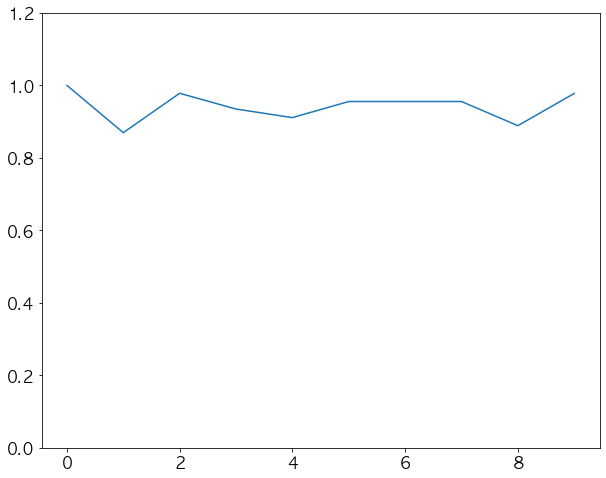

In [68]:
# 성능 그래프
plt.plot(result_list)
plt.ylim(0, 1.2)
plt.show()

### 모델 중단하고 저장하기

In [8]:
# 모델 설정
model = Sequential()
model.add(Dense(60, input_dim=30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 자동 중단설정
# patience : 지정해준 숫자만큼 동안 성능향상이 이루어지지 않았다면 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience =5000 )

In [11]:
# 모델 저장
model_path = 'models/cancer/{epoch}-{val_loss}.hdf5'

# 저장조건
checkPointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only =True)

In [12]:
# 모델 실행
model.fit(x,y, validation_split=0.33, epochs=100000, batch_size=500, verbose=0,
         callbacks=[early_stopping_callback,checkPointer])

In [83]:
# 학습완료된 모델을 로딩한다.
best_model = load_model('models/cancer/1908-0.038345932960510254.hdf5')
best_model

In [84]:
# 예측결과 추출한다.
pred = (best_model.predict(x)>0.5).astype('int32')

In [85]:
# 결과 확인
r1 = accuracy_score(y,pred)
r1

0.9691629955947136

### 새로운 데이터를 예측한다.

In [16]:
# 새로운 입력데이터 가져오기
df_new = pd.read_csv('../dataset/breast_cancer_new.csv')
df_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291


In [94]:
new_pred = (best_model.predict(df_new)>0.5).astype('int32')

In [81]:
# 새로운 입력데이터에 맞는 결과 데이터 가져오기
df_result = pd.read_csv('../dataset/breast_cancer_result.csv')
df_result.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,...,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330,benign
1,1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,malignant
2,2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,...,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220,benign
3,3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788,benign
4,4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,benign


In [91]:
# 결과데이터 가져오기
y_result = df_result['target']

In [92]:
# 문자열 인코딩
encoder = LabelEncoder()
encoder.fit(y_result)
y_result = encoder.transform(y_result)

In [95]:
# 예측값과 실제 결과값 비교
r1 = accuracy_score(y_result, new_pred)
r1

0.9391304347826087

### 강사님이 만든 모델로 성능평가

In [13]:
# 모델 불러오기
loss_model = load_model('models/cancer/loss_2479-0.00948227196931839.hdf5')
acc_model = load_model('models/cancer/accuracy_499-0.9890109896659851.hdf5')

In [14]:
# 학습한 데이터로 성능평가
a1 = loss_model.evaluate(x, y)[1]
a2 = acc_model.evaluate(x, y)[1]

print(a1)
print(a2)

15/15 [==============================] - 0s 699us/step - loss: 0.0973 - accuracy: 0.9626
0.9933920502662659
0.9625550508499146


In [18]:
# 예측 결과를 추출한다.
pred2 = (loss_model.predict(df_new) > 0.5).astype('int32')
pred2[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [20]:
# 결과 데이터를 붙힌다.
df_new['target'] = pred2
df_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330,0
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,0
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220,0
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788,0
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,0


In [ ]:
df_new.to_csv('data/breast_cancer_deep_result.csv')